In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("data/results/output.txt", header=None, names=["mfccs", "window", "dist", "fn", "speaker", "guess"])
df["correct guess"] = df.apply(lambda x: x["speaker"] == x["guess"], axis=1)
fd = df.groupby(["mfccs", "window", "dist", "fn"]).size().reset_index().rename(columns={0:'count'})
fd["count"] = fd.apply(lambda x: np.mean(df[(df["mfccs"] == x["mfccs"])
                                            & (df["window"] == x["window"])
                                            & (df["dist"] == x["dist"])
                                            & (df["fn"] == x["fn"])]["correct guess"]), axis=1)

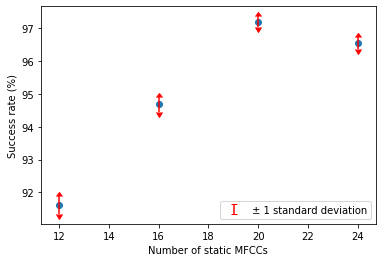

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = x=fd["mfccs"].unique()
y = fd.apply(lambda x: 100*np.mean(fd[fd["mfccs"] == x["mfccs"]]["count"]), axis=1).unique()
error = np.sqrt([df[df["mfccs"] == i]["correct guess"].var() for i in df["mfccs"].unique()])
plt.errorbar(x,y,yerr=error, color="r", linestyle="None", uplims=True, lolims=True, label='± 1 standard deviation')
ax.set_xlabel('Number of static MFCCs')
ax.set_ylabel('Success rate (%)')
ax.scatter(x=x,y=y)
plt.legend(loc='lower right')

plt.savefig("Figure_1.png")

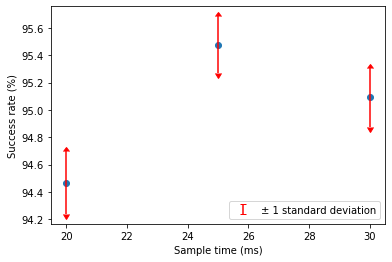

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = 1000*fd["window"].unique()
y = fd.apply(lambda x: 100*np.mean(fd[fd["window"] == x["window"]]["count"]), axis=1).unique()
error = np.sqrt([df[df["window"] == i]["correct guess"].var() for i in df["window"].unique()])
ax.scatter(x=x, y=y)
ax.set_xlabel('Sample time (ms)')
ax.set_ylabel('Success rate (%)')
plt.errorbar(x,y,yerr=error, color="r", linestyle="None", uplims=True, lolims=True, label='± 1 standard deviation')
plt.legend(loc='lower right')

plt.savefig("Figure_2.png")

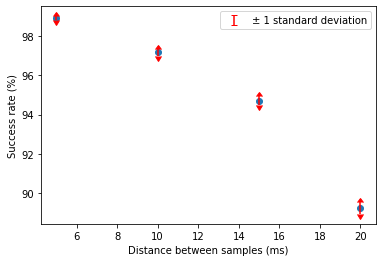

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = 1000*fd["dist"].unique()
y = fd.apply(lambda x: 100*np.mean(fd[fd["dist"] == x["dist"]]["count"]), axis=1).unique()
error = np.sqrt([df[df["dist"] == i]["correct guess"].var() for i in df["dist"].unique()])
ax.scatter(x=x, y=y)
ax.set_xlabel('Distance between samples (ms)')
ax.set_ylabel('Success rate (%)')
plt.errorbar(x,y,yerr=error, color="r", linestyle="None", uplims=True, lolims=True, label='± 1 standard deviation')
plt.legend(loc='upper right')

plt.savefig("Figure_3.png")

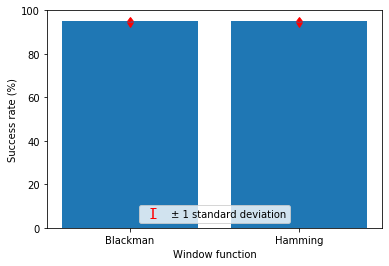

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = fd["fn"].unique()
y = fd.apply(lambda x: 100*np.mean(fd[fd["fn"] == x["fn"]]["count"]), axis=1).unique()
error = np.sqrt([df[df["fn"] == i]["correct guess"].var() for i in df["fn"].unique()])
ax.bar(x=x, height=y)
ax.set_xlabel('Window function')
ax.set_ylabel('Success rate (%)')
plt.errorbar(x,y,yerr=error, color="r", linestyle="None", uplims=True, lolims=True, label='± 1 standard deviation')
plt.legend(loc='lower center')

plt.savefig("Figure_4.png")

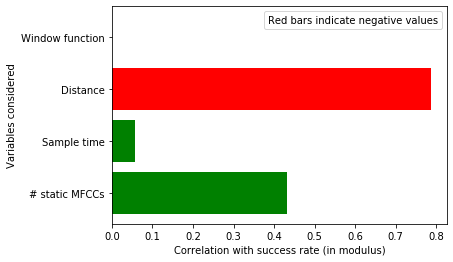

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(y=["# static MFCCs", "Sample time", "Distance", "Window function"],
       width=list(np.absolute(fd.corr().iloc[:3]["count"]))+[0.00000000000000001156482],
       color=((fd.corr()["count"] < 0).map({True: 'r', False: 'g'})),
       label="Red bars indicate negative values")
ax.set_ylabel('Variables considered')
ax.set_xlabel('Correlation with success rate (in modulus)')
plt.legend(loc='upper right', handletextpad=0, handlelength=0)

plt.savefig("Figure_5.png")

In [8]:
fd.corr()

,mfccs,window,dist,count
mfccs,1.000000e+00,1.187684e-17,1.156482e-17,0.432008
window,1.187684e-17,1.000000e+00,-6.185854e-18,0.056977
dist,1.156482e-17,-6.185854e-18,1.000000e+00,-0.786916
count,4.320084e-01,5.697666e-02,-7.869161e-01,1.000000


mfccs     0.432008
window    0.056977
dist     -0.786916
Name: count, dtype: float64

In [124]:
fd.apply(lambda x: np.mean(fd[fd["mfccs"] == x["mfccs"]]["count"]), axis=1).unique()

array([0.91617647, 0.94681373, 0.97205882, 0.96544118])

In [12]:
fd[(fd["count"]==1) | (fd["count"] < 0.89) ]

,mfccs,window,dist,fn,count
6,12,0.020,0.020,Blackman,0.823529
7,12,0.020,0.020,Hamming,0.823529
14,12,0.025,0.020,Blackman,0.847059
15,12,0.025,0.020,Hamming,0.847059
22,12,0.030,0.020,Blackman,0.847059
23,12,0.030,0.020,Hamming,0.847059
30,16,0.020,0.020,Blackman,0.852941
31,16,0.020,0.020,Hamming,0.852941
38,16,0.025,0.020,Blackman,0.882353
39,16,0.025,0.020,Hamming,0.888235


In [234]:
df.iloc[1188:].head(5)

,mfccs,window,dist,fn,speaker,guess,correct guess
1188,12,0.025,0.015,Hamming,belmontguy,belmontguy,True
1189,12,0.025,0.015,Hamming,belmontguy,belmontguy,True
1190,12,0.025,0.020,Hamming,anthonyschaller,arvala,False
1191,12,0.025,0.020,Hamming,anthonyschaller,arvala,False
1192,12,0.025,0.020,Hamming,anthonyschaller,anthonyschaller,True


In [174]:
for i in df["mfccs"].unique():
    print(df[df["mfccs"] == i]["correct guess"].mean(), df[df["mfccs"] == i]["correct guess"].var())

0.9161764705882353 0.07681597277302685
0.946813725490196 0.05036984026265568
0.9720588235294118 0.027167125737277014
0.9654411764705882 0.033372690826759734


In [175]:
for i in df["window"].unique():
    print(df[df["window"] == i]["correct guess"].mean(), df[df["window"] == i]["correct guess"].var())

0.9446691176470589 0.0522789859186918
0.9547794117647059 0.04318362480127186
0.9509191176470588 0.04668053032023621


In [176]:
for i in df["dist"].unique():
    print(df[df["dist"] == i]["correct guess"].mean(), df[df["dist"] == i]["correct guess"].var())

0.9892156862745098 0.010670627652875323
0.9718137254901961 0.027398523763513746
0.9470588235294117 0.05015070014276855
0.8924019607843138 0.09604424142787786


In [177]:
for i in df["fn"].unique():
    print(df[df["fn"] == i]["correct guess"].mean(), df[df["fn"] == i]["correct guess"].var())

0.9502450980392156 0.04728514643999528
0.95 0.04750582179188626


In [186]:
[df[df["mfccs"] == i]["correct guess"].var() for i in df["mfccs"].unique()]

[0.07681597277302685,
 0.05036984026265568,
 0.027167125737277014,
 0.033372690826759734]